In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten, Input
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [6]:

ih, iw = 200, 200 #Se define el tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

train_dir = 'data/train' #Nombre del directorio de entrenamiento
test_dir = 'data/test' #Nombre del directorio de prueba


num_class = 2 #cuantas clases (Perros y Gatos)
epochs = 500 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros
batch_size = 100 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 20000 #numero de imagenes en train
num_test = 5000 #numero de imagenes en test

epoch_steps = num_train // batch_size
test_steps = num_test // batch_size

gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.
train = gentrain.flow_from_directory(train_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')
gentest = ImageDataGenerator(rescale=1. / 255)
test = gentest.flow_from_directory(test_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


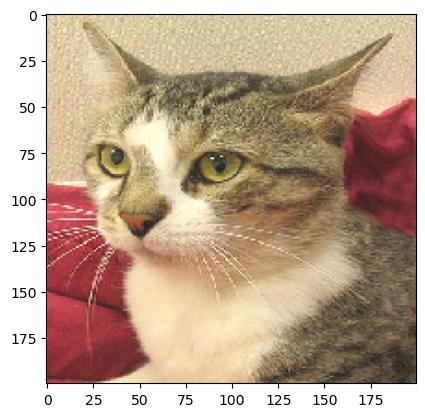

la forma de la imagen es: (100, 200, 200, 3)


In [7]:

import matplotlib.pyplot as plt


image = train[0][0][0]  # Obtener la primera imagen del lote
plt.imshow(image)
plt.show()
print("la forma de la imagen es:", train[0][0].shape)


# In[44]:




1/1 [==============================] - 0s 151ms/step


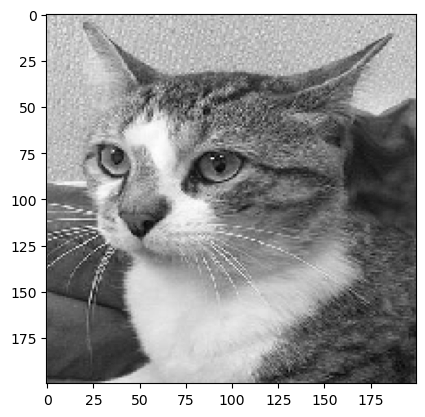

La forma de la imagen en escala de grises es: (100, 200, 200, 1)


In [9]:

# Función para convertir una imagen a escala de grises
def grayscale(image):
    inputs = Input(shape=image.shape)
    # Capa de convolución con filtro 1x1
    conv_layer = Conv2D(1, (1, 1), activation='relu', use_bias=False, weights=[np.ones((1, 1, 3, 1))])
    output = conv_layer(inputs)
    model = Model(inputs=inputs, outputs=output)
    grayscale_image = model.predict(np.expand_dims(image, axis=0))
    return grayscale_image

# Cargar tu imagen de entrenamiento, por ejemplo:
image = train[0][0]

# Convertir la imagen a escala de grises
grayscale_image = grayscale(image)

# Visualizar la imagen en escala de grises
plt.imshow(grayscale_image[0, :, :, :, 0][0], cmap='gray')
plt.show()
print("La forma de la imagen en escala de grises es:", grayscale_image[0].shape)
